In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START,END
import random

In [2]:
class AgentState(TypedDict):
    name: str 
    number : List[int]
    counter : int

In [3]:
def greeting_node(state:AgentState) -> AgentState:
    "Greeting Node"
    state["name"] = f'Hi there,{state["name"]}!'
    state["counter"] = 0
    return state

def random_node(state:AgentState)-> AgentState:
    """Generate a random number from 1 to 10"""
    state["number"]. append(random.randint(1,10))
    state["counter"] += 1
    return state

In [4]:
def should_continue(state:AgentState) -> AgentState:
    """Decide whether to continue looping or end"""
    if state['counter'] < 5:
        return "loop"
    else:
        return "exit"

In [5]:
# greetin -> random -> random ... -> 

graph = StateGraph(AgentState)
graph.add_node("greeting",greeting_node)
graph.add_node("random",random_node)

graph.add_edge(START,"greeting")

graph.add_edge("greeting", "random")
graph.add_conditional_edges(
    "random",
    should_continue,
    {"loop": "random",
     "exit": END}
)

In [6]:
app = graph.compile()

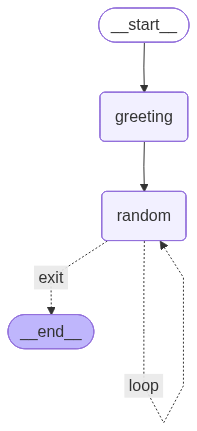

In [7]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result = app.invoke({
    "name"  : "AK",
    "number": [],   
    "counter": 0
})

In [9]:
result

{'name': 'Hi there,AK!', 'number': [4, 6, 9, 10, 2], 'counter': 5}